# Unsupervised Clustering of US Stocks Based on Cash-Related Variables

#### Project Topic
In this project, I implemented multiple unsupervised machine learning clustering algorithms to group US stocks based on cash-related variables. While there are many different lenses through which one could analyze whether a given stock is a good investment, one approach is to consider the cashflow position of a company. This would be most relevant during a recession, which some have speculated may soon begin or has already begun within the United States. A defensive and conservative position an investor might want to take would focus on the companies most likely to survive a recession and continue to provide profits back to the shareholders, namely large companies with positive cash flow and high historical dividend rates. Other investors might want to take a more aggresive approach during a recession, in which case knowledge of the constituent stocks of other groups could also be valuable.

Current Exchange Traded Funds (ETFs) allow grouping of stocks so investors can achieve some diversification while holding to a given strategy. From my internet searching, I couldn't find any ETFs with this exact focus. To that end, I extracted cash flow, dividend, and total market capitalization values for the S&P 500 list of stocks.

After cleaning, pre-processing, and exploring the data, I implemented KMeans and Agglomerative Clustering models to capture what groupings I could discern from the dataset. I found the KMeans approach to be more accurate, as quantified by the calcuation of Silhoutte Scores.

In the end, I provided a list of the stocks that would fall within each of the different cluster groups.

# Data

In [55]:
#Importing relevant Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [56]:
#From Reference 5
stock_tickers = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL', 'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EG', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FITB', 'FSLR', 'FE', 'FIS', 'FI', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR', 'PKG', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RVTY', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM']
#print(stock_tickers)

Using the Yahoo Finance (Reference 6) API, I downloaded the dividend, free cash flow, and market capitalization data for all S&P 500 companies and store them in a pandas dataframe.

In [69]:
df = pd.DataFrame(columns = ['ticker','Dividends','Free Cash Flow', 'Market Cap'])
for i in stock_tickers:
    stock = yf.Ticker(i)
    #print(stock)
    #print(stock.dividends.shape[0])
    if stock.dividends.shape[0] > 0:
        div = stock.dividends.iloc[stock.dividends.shape[0]-1]
    else:
        div = 0
    
    fcf = stock.cash_flow.iloc[0,0]
    
    mkt_cap = stock.balance_sheet.iloc[9,0]
    
    df.loc[i] = [i,div,fcf,mkt_cap]
    #print(stock.dividends.shape[0])

In [57]:
df.to_csv('dataframe.csv')

To make it faster to retrieve the data as I developed this notebook, I saved the dataframe to a csv saved locally on my computer. This is faster than pulling all stock data from the Yahoo Finance website each time I restart the notebook.

In [58]:
df = pd.read_csv('dataframe.csv').set_index('ticker')

# Data Cleaning and Exploratory Data Analysis

My first step in data cleaning and exploratory data analysis was to inspect the dataframe after reimporting back from csv format. This showed an extra column had been added to the conversions, which I subsequently deleted.

In [59]:
print(df)

       Unnamed: 0  Dividends  Free Cash Flow    Market Cap
ticker                                                    
MMM           MMM      1.500    3.842000e+09  2.610000e+08
AOS           AOS      0.320    3.211000e+08  1.747700e+09
ABT           ABT      0.510    7.804000e+09  9.430000e+08
ABBV         ABBV      1.480    2.424800e+10  1.725400e+10
ACN           ACN      1.290    8.996096e+09  2.569284e+10
...           ...        ...             ...           ...
GWW           GWW      1.860    1.077000e+09  3.860000e+08
WYNN         WYNN      0.250   -4.237760e+08  1.615157e+09
XEL           XEL      0.520   -7.060000e+08  1.667500e+10
XYL           XYL      0.330    3.880000e+08  6.900000e+07
YUM           YUM      0.605    1.148000e+09 -8.876000e+09

[496 rows x 4 columns]


In [60]:
df = df.drop(columns = ['Unnamed: 0'])

Next, I plotted histograms of the three different variables. These showed that the data was not normally distributed, and even more potentially problematic, the scales of the variables varied by many orders of magnitude. Specifically, the market capitalization and free cash flow variables had data points 11 times larger than the dividends variable. Using the Python Standard Scaler, I rescaled the data so that it would be easier for future machine learning models.

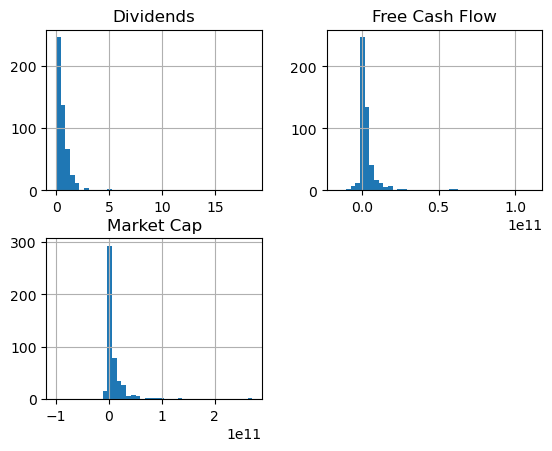

In [5]:
df.hist(bins=42)
plt.show()

In [61]:
df = df.dropna()
values = df.values
print(values)
scaler = StandardScaler().fit(values)
scaled_values = pd.DataFrame(scaler.fit_transform(values), columns = df.columns, index = df.index)
print(scaled_values)

[[ 1.5000e+00  3.8420e+09  2.6100e+08]
 [ 3.2000e-01  3.2110e+08  1.7477e+09]
 [ 5.1000e-01  7.8040e+09  9.4300e+08]
 ...
 [ 5.2000e-01 -7.0600e+08  1.6675e+10]
 [ 3.3000e-01  3.8800e+08  6.9000e+07]
 [ 6.0500e-01  1.1480e+09 -8.8760e+09]]
        Dividends  Free Cash Flow  Market Cap
ticker                                       
MMM      0.831286        0.050806   -0.365383
AOS     -0.301083       -0.316162   -0.317634
ABT     -0.118752        0.463749   -0.343479
ABBV     0.812093        2.177639    0.180386
ACN      0.629763        0.587996    0.451418
...           ...             ...         ...
GWW      1.176755       -0.237378   -0.361368
WYNN    -0.368257       -0.393798   -0.321891
XEL     -0.109156       -0.423213    0.161790
XYL     -0.291486       -0.309190   -0.371549
YUM     -0.027587       -0.229978   -0.658838

[489 rows x 3 columns]


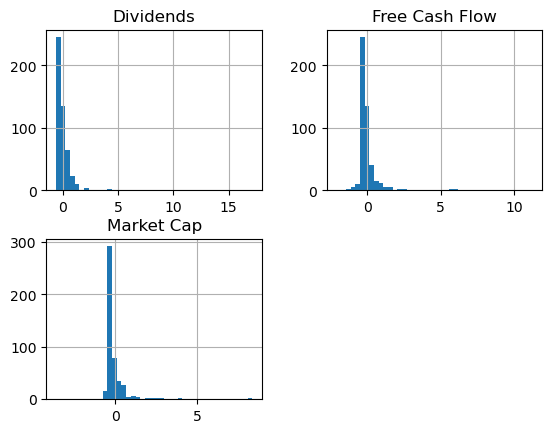

In [68]:
scaled_values.hist(bins=42)
plt.show()

Next, I removed the outliers. Some of the clustering algorithms, such as KMeans, can be very sensitive to outliers. Since the purpose of my modeling is to capture general grouping, I removed the outlier data points so that I could focus more on the region in which the clusters border one another. I determined the outliers by looking at box and whisker plots.

<Axes: >

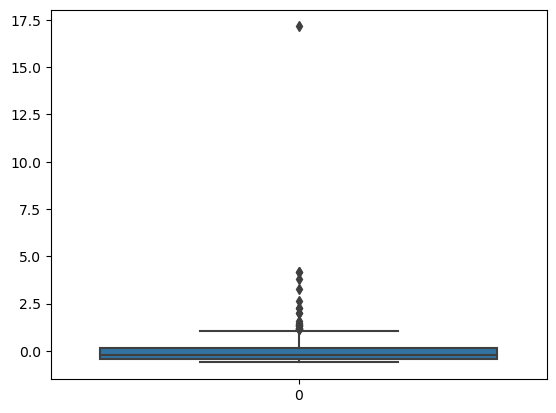

In [8]:
sns.boxplot(scaled_values['Dividends'])

<Axes: >

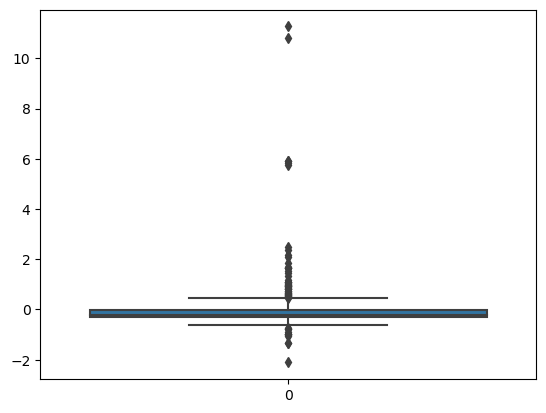

In [9]:
sns.boxplot(scaled_values['Free Cash Flow'])


<Axes: >

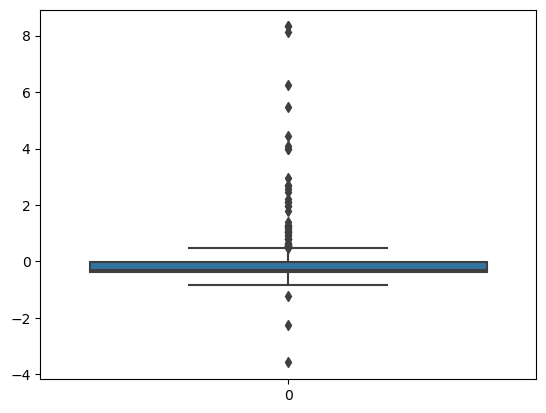

In [10]:
sns.boxplot(scaled_values['Market Cap'])

In [65]:
dfcut = scaled_values
#print(dfcut)

dfcut = dfcut.drop(dfcut[dfcut['Dividends']>2.5].index)
dfcut = dfcut.drop(dfcut[dfcut['Free Cash Flow'] > 2].index)
dfcut = dfcut.drop(dfcut[dfcut['Market Cap'] > 2].index)
df = df.dropna()
#print(dfcut)
#REMOVED 20 OUTLIER ROWS

For the final step in my exploratory data analysis, I calculated the correlation coefficients between each variable and plotted them in a heatmap. These showed low values across the board, which is promising and lends itself well to various modeling approaches.

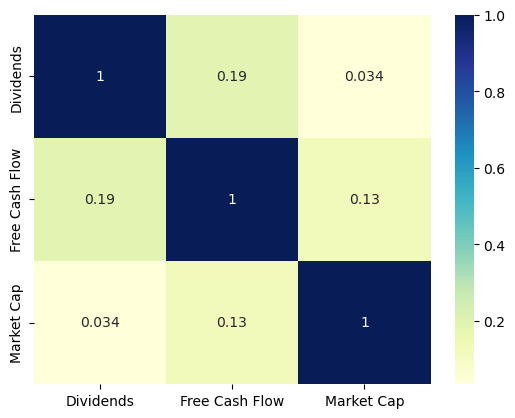

In [67]:
dataplot = sns.heatmap(dfcut.corr(), cmap="YlGnBu", annot=True) 

# Model
My intention with this project is to use unsupervised machine learning to group stocks based on free cash flow, dividends, and market capitalization. As was found in the exploratory data analysis section of this report, there are no issues with collinearity between features.

The two approaches I chose to implement were K-Means Clustering and Agglomerative Clustering. I then compared the performance between the two sets of results.

First, since K-Means requires a manual definition of the number of clusters, I created a for loop to create models with between 1 and 10 clusters. Then, I plotted the distortions (a metric somewhat analogous to error in a supervised machine learning hyperparameter tuning context) as a function of the number of clusters. That shows that 3 clusters is the point after which the elbow levels out.

Second, I applied Agglomerative Clustering to the same dataset. Agglomerative Clustering is a type of hiearcharcical clustering algorithm.

/Users/sjzorek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sjzorek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sjzorek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sjzorek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sjzor

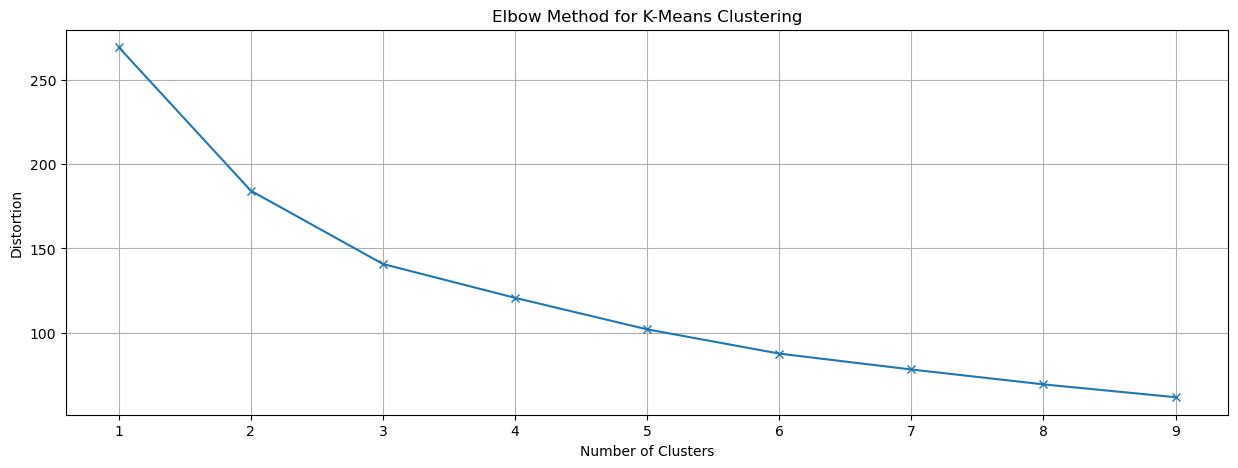

In [74]:
K = range(1,10)
distortions = []
d=[]
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(dfcut)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize= (15,5))
plt.plot(K, distortions, 'x-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method for K-Means Clustering')
plt.grid(True)
plt.show()


In [ ]:
#Implementing Agglomerative Clustering with the same number of clusters found for the K-Means approach
aglo = AgglomerativeClustering(n_clusters=3)
aclusters = aglo.fit_predict(data)

# Results and Analysis
Based on the elbow method plot, I could see that 3 clusters is the optimal number for the dataset features being modeling. I used 3 clusters as the standard with which to compare the K-Means approach with Agglomerative Clustering.

I compared the two modeling approaches both visually and numerically. For visual assessment, I originally created a 3D scatter plot that showed the K-Means grouping. While that visualization was helpful, it was hard to see the clustering delineations in 3D.

To that end, I performed Principal Component Analysis and projected the features onto a 2D plane. Visually, both modeling approaches produced similar clusterings. However, the boundary for the K-Means approach did look slightly cleaner.

Finally, to compare the two approaches, I calculated the Silhouette Coefficient for each. The Silhouette Coefficient is a way to quantify similiary within versus between clusters. A score of 1 would be perfect; higher is better. I used Silhouette Coefficients because I don't already have a base truth clustering with which to compare and calculate error. There isn't a single right answer in that respect. This metric was an appropriate tool for the context. The K-Means Silhouette Coefficient was 0.45 and the Agglomerative Clustering Silhouette Coefficient was 0.37.

By both visual and numerical comparisons, the K-Means approach with 3 clusters was the best model tested in this project.

In [20]:
data = dfcut.values
model=KMeans(n_clusters=3)
model.fit(data)
label=model.predict(data)
center=model.cluster_centers_


/Users/sjzorek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 0, 'Market Capitalization')

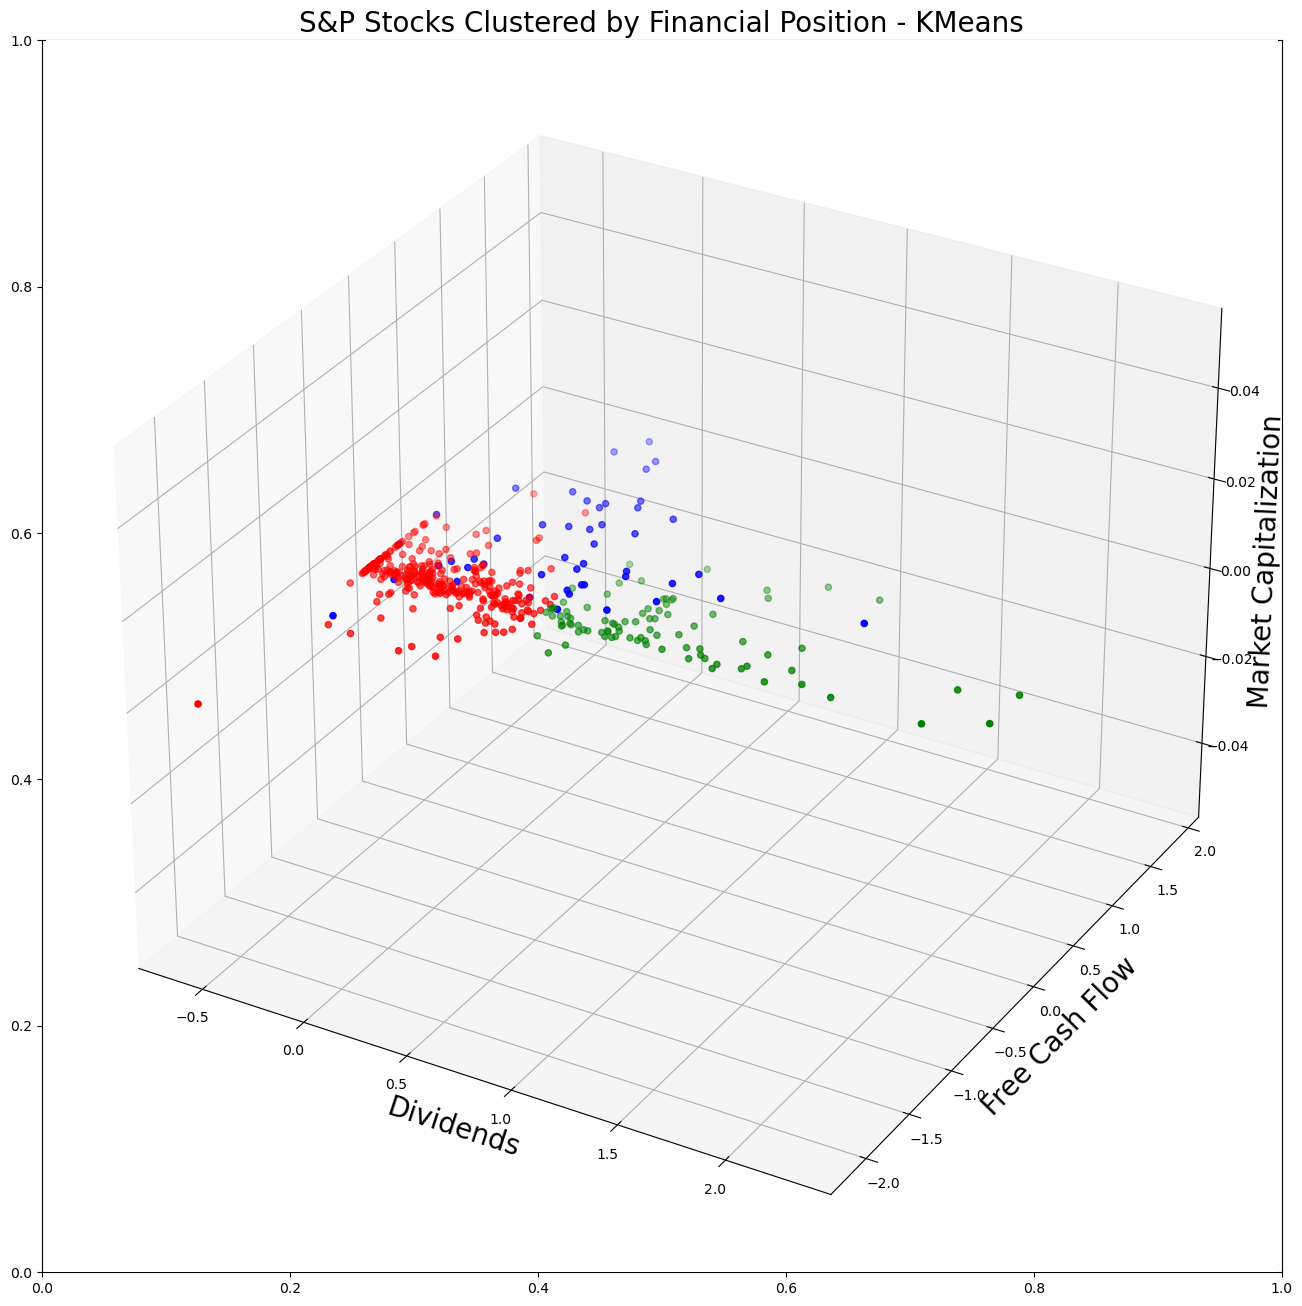

In [75]:
fig = plt.subplots(figsize=(16,16))
ax = plt.axes(projection = "3d")
ax.scatter3D(data[label==0, 0], data[label==0, 1], c='red',s=20)
ax.scatter3D(data[label==1, 0], data[label==1, 1], c='blue', s=20)
ax.scatter3D(data[label==2, 0], data[label==2, 1], c='green', s=20)

ax.set_title('S&P Stocks Clustered by Financial Position - KMeans', fontsize=20)
ax.set_xlabel('Dividends', fontsize=20)
ax.set_ylabel('Free Cash Flow', fontsize=20)
ax.set_zlabel('Market Capitalization', fontsize=20)

[Text(0.5, 1.0, 'KMeans Clustering - PCA Visualization')]

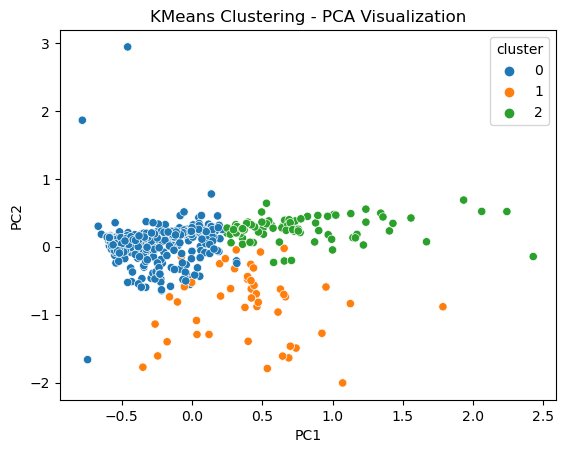

In [76]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(label)
pca1 = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
pca1.set(title = 'KMeans Clustering - PCA Visualization')

[Text(0.5, 1.0, 'Agglomerative Clustering - PCA Visualization')]

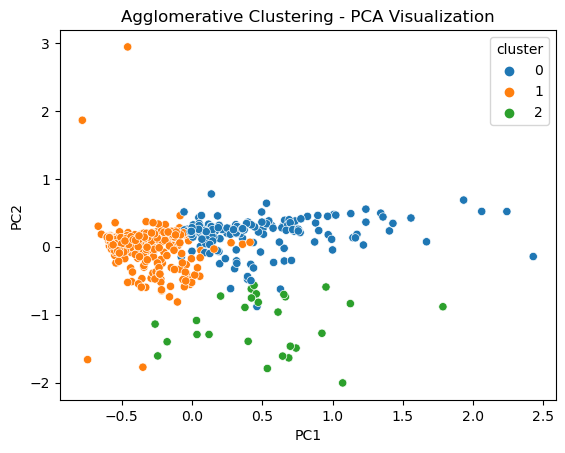

In [79]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(aclusters)
pca1 = sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
pca1.set(title = 'Agglomerative Clustering - PCA Visualization')

In [52]:
sc1 = metrics.silhouette_score(data,label)
print('KMeans Clustering Silhouette Score = ',sc1)


sc2 = metrics.silhouette_score(data,aclusters)
print('Agglomerative Clustering Silhouette Score = ', sc2)


KMeans Clustering Silhouette Score =  0.44990223782252553
Agglomerative Clustering Silhouette Score =  0.36780352575505126


In [96]:
t = []
c = []
result = []
names = dfcut.axes[0].tolist()

for i in range(label.shape[0]):
    row = label[i]
    result.append([names[i],row])

print(result)

[['MMM', 2], ['AOS', 0], ['ABT', 0], ['ACN', 1], ['ADM', 0], ['ADBE', 0], ['ADP', 2], ['AES', 0], ['AFL', 0], ['A', 0], ['ABNB', 0], ['APD', 2], ['AKAM', 0], ['ALK', 0], ['ARE', 2], ['ALGN', 0], ['ALLE', 0], ['LNT', 0], ['ALL', 1], ['MO', 2], ['AMZN', 0], ['AMCR', 0], ['AMD', 1], ['AEE', 0], ['AAL', 0], ['AEP', 0], ['AXP', 1], ['AIG', 1], ['AMT', 2], ['AWK', 0], ['AMP', 2], ['AME', 0], ['AMGN', 1], ['APH', 0], ['ADI', 1], ['ANSS', 0], ['AON', 0], ['APA', 0], ['AMAT', 0], ['APTV', 0], ['ACGL', 0], ['ANET', 0], ['AJG', 0], ['AIZ', 0], ['T', 0], ['ATO', 0], ['ADSK', 0], ['AZO', 0], ['AVB', 2], ['AVY', 0], ['AXON', 0], ['BKR', 0], ['BALL', 0], ['BAC', 0], ['BBWI', 0], ['BAX', 0], ['BDX', 1], ['WRB', 0], ['BBY', 2], ['BIO', 0], ['TECH', 0], ['BIIB', 0], ['BX', 1], ['BK', 1], ['BA', 2], ['BKNG', 0], ['BWA', 0], ['BXP', 2], ['BSX', 0], ['BMY', 0], ['BR', 0], ['BRO', 0], ['BG', 0], ['CHRW', 0], ['CDNS', 0], ['CZR', 0], ['CPT', 2], ['CPB', 0], ['COF', 1], ['CAH', 0], ['KMX', 0], ['CCL', 0], ['C

# Discussion and Conclusion
In this project, I used unsupervised machine learning to group US stocks based on cash flow, market capitalization, and dividends. Practically, I could envision this grouping being useful for an investor or day trader trying to ride out market turbulence by sticking with more stable stocks, or alternatively, taking a more aggresive approach. Grouping allows for either and illuminates patterns in the dataset.

After cleaning and performing an exploratory data analysis, I build K-Means and Agglomerative Clustering models. I tuned the number of clusters using the Elbow Method.

I compared the two modeling approaches and both visually and quantitatively, the K-Means was better.

In terms of learning and takeaways, this project helped me understand practically how unsupervised machine learning can be used to solve real-world problems. Instead of being directed on which modeling approach to use, I had to explore that myself. Initially, I actually tried to cluster time history data using the K-Means approach. I quickly figured out that without other types of reformatting, this wouldn't be helpful because if each day were a feature, there would be no way to visualize what the groupings actually looked like. If I were to continue this project further, I would want to add stock price history as a variable and explore which factors can be used to predict future stock value.

### References:
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
- https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/#
- https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/
- https://stackoverflow.com/questions/66204637/visualizing-clusters-result-using-pca-python
- Sophia Zorek - my sister is a statistics student at another university and we discussed my project idea during a call and she also provideded me an example code from one of her Python projects that output the list of S&P500 stock ticker names
- https://pypi.org/project/yfinance/
- https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
- CU Boulder DTSA 5510 class lectures and materials
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html